## Evaluation of Group Recommendation Algorithms with Aggregation Strategy: "Least Misery"

### Loading recommendation output and test data

In [19]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats


# Load results files: n = 100
recs100 = pd.read_csv('output/LEAST_MISERY-100/recs.csv')
test_data100 = pd.read_csv('output/LEAST_MISERY-100/testdata.csv')
preds100 = pd.read_csv('output/LEAST_MISERY-100/preds.csv')

# Load results files: n = 10
recs10 = pd.read_csv('output/LEAST_MISERY-10/recs.csv')
test_data10 = pd.read_csv('output/LEAST_MISERY-10/testdata.csv')
preds10 = pd.read_csv('output/LEAST_MISERY-10/preds.csv')

# Load results files: n = 5
recs5 = pd.read_csv('output/LEAST_MISERY-5/recs.csv')
test_data5 = pd.read_csv('output/LEAST_MISERY-5/testdata.csv')
preds5 = pd.read_csv('output/LEAST_MISERY-5/preds.csv')

# Load results files: n = 3
recs3 = pd.read_csv('output/LEAST_MISERY-3/recs.csv')
test_data3 = pd.read_csv('output/LEAST_MISERY-3/testdata.csv')
preds3 = pd.read_csv('output/LEAST_MISERY-3/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [20]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results100 = rla.compute(recs100, test_data100)
ndcg100 = results100.groupby('Algorithm').ndcg.mean()
precision100 = results100.groupby('Algorithm').precision.mean()
recall100 = results100.groupby('Algorithm').recall.mean()

results10 = rla.compute(recs10, test_data10)
ndcg10 = results10.groupby('Algorithm').ndcg.mean()
precision10 = results10.groupby('Algorithm').precision.mean()
recall10 = results10.groupby('Algorithm').recall.mean()

results5 = rla.compute(recs5, test_data5)
ndcg5 = results5.groupby('Algorithm').ndcg.mean()
precision5 = results5.groupby('Algorithm').precision.mean()
recall5 = results5.groupby('Algorithm').recall.mean()

results3 = rla.compute(recs3, test_data3)
ndcg3 = results3.groupby('Algorithm').ndcg.mean()
precision3 = results3.groupby('Algorithm').precision.mean()
recall3 = results3.groupby('Algorithm').recall.mean()

In [21]:

df = pd.DataFrame({'Algorithm':ndcg100.index, 'ndcg':ndcg100.values, 'n':100})
ndcg_df = pd.concat([df, pd.DataFrame({'Algorithm':ndcg10.index, 'ndcg':ndcg10.values, 'n':10}), pd.DataFrame({'Algorithm':ndcg5.index, 'ndcg':ndcg5.values, 'n':5}), pd.DataFrame({'Algorithm':ndcg3.index, 'ndcg':ndcg3.values, 'n':3})], ignore_index=True)
print(ndcg_df.sort_values(by=['n', 'ndcg'], ascending=False))



Algorithm      ndcg    n
3        rel  0.102347  100
8       trst  0.102219  100
4      socap  0.101976  100
6     soxsim  0.101714  100
7       symp  0.101669  100
5     socsim  0.101538  100
1     hierch  0.101147  100
0      domex  0.098879  100
2         ii  0.063321  100
12       rel  0.080691   10
17      trst  0.080226   10
13     socap  0.079958   10
14    socsim  0.079818   10
15    soxsim  0.079470   10
16      symp  0.079408   10
10    hierch  0.078879   10
9      domex  0.074202   10
11        ii  0.040959   10
21       rel  0.044690    5
22     socap  0.043651    5
23    socsim  0.043651    5
24    soxsim  0.043651    5
25      symp  0.043651    5
26      trst  0.043651    5
19    hierch  0.043101    5
18     domex  0.041761    5
20        ii  0.029306    5
27     domex  0.028817    3
28    hierch  0.028817    3
30       rel  0.028817    3
31     socap  0.028817    3
32    socsim  0.028817    3
33    soxsim  0.028817    3
34      symp  0.028817    3
35      trst  0.028817 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


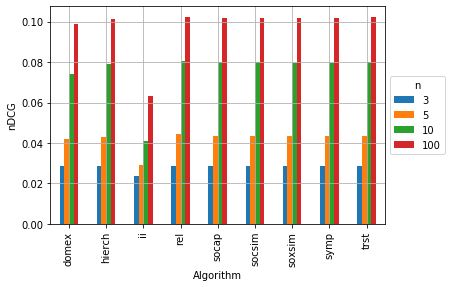

In [22]:
ndcg_df.pivot("Algorithm", "n", "ndcg").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('nDCG')
plt.show()

## Precision at n

In [23]:
df = pd.DataFrame({'Algorithm':precision100.index, 'precision':precision100.values, 'n':100})
precision_df = pd.concat([df, pd.DataFrame({'Algorithm':precision10.index, 'precision':precision10.values, 'n':10}), pd.DataFrame({'Algorithm':precision5.index, 'precision':precision5.values, 'n':5}), pd.DataFrame({'Algorithm':precision3.index, 'precision':precision3.values, 'n':3})], ignore_index=True)
print(precision_df.sort_values(by=['n', 'precision'], ascending=False))

Algorithm  precision    n
0      domex   0.002619  100
1     hierch   0.002619  100
3        rel   0.002619  100
4      socap   0.002619  100
5     socsim   0.002619  100
6     soxsim   0.002619  100
7       symp   0.002619  100
8       trst   0.002619  100
2         ii   0.001905  100
10    hierch   0.011905   10
12       rel   0.011905   10
13     socap   0.011905   10
14    socsim   0.011905   10
15    soxsim   0.011905   10
16      symp   0.011905   10
17      trst   0.011905   10
9      domex   0.011111   10
11        ii   0.006349   10
18     domex   0.009524    5
19    hierch   0.009524    5
21       rel   0.009524    5
22     socap   0.009524    5
23    socsim   0.009524    5
24    soxsim   0.009524    5
25      symp   0.009524    5
26      trst   0.009524    5
20        ii   0.007937    5
27     domex   0.010582    3
28    hierch   0.010582    3
30       rel   0.010582    3
31     socap   0.010582    3
32    socsim   0.010582    3
33    soxsim   0.010582    3
34      symp   0.

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


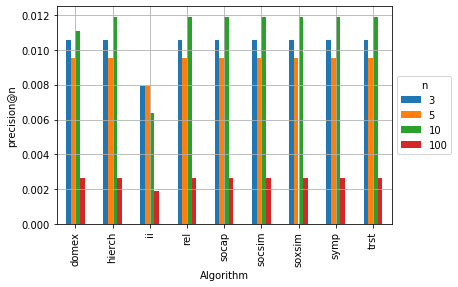

In [24]:
precision_df.pivot("Algorithm", "n", "precision").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('precision@n')
plt.show()

## Recall at n

In [25]:
df = pd.DataFrame({'Algorithm':recall100.index, 'recall':recall100.values, 'n':100})
recall_df = pd.concat([df, pd.DataFrame({'Algorithm':recall10.index, 'recall':recall10.values, 'n':10}), pd.DataFrame({'Algorithm':recall5.index, 'recall':recall5.values, 'n':5}), pd.DataFrame({'Algorithm':recall3.index, 'recall':recall3.values, 'n':3})], ignore_index=True)
print(recall_df.sort_values(by=['n', 'recall'], ascending=False))

Algorithm    recall    n
0      domex  0.257937  100
1     hierch  0.257937  100
3        rel  0.257937  100
4      socap  0.257937  100
5     socsim  0.257937  100
6     soxsim  0.257937  100
7       symp  0.257937  100
8       trst  0.257937  100
2         ii  0.190476  100
10    hierch  0.115079   10
12       rel  0.115079   10
13     socap  0.115079   10
14    socsim  0.115079   10
15    soxsim  0.115079   10
16      symp  0.115079   10
17      trst  0.115079   10
9      domex  0.107143   10
11        ii  0.063492   10
18     domex  0.047619    5
19    hierch  0.047619    5
21       rel  0.047619    5
22     socap  0.047619    5
23    socsim  0.047619    5
24    soxsim  0.047619    5
25      symp  0.047619    5
26      trst  0.047619    5
20        ii  0.039683    5
27     domex  0.031746    3
28    hierch  0.031746    3
30       rel  0.031746    3
31     socap  0.031746    3
32    socsim  0.031746    3
33    soxsim  0.031746    3
34      symp  0.031746    3
35      trst  0.031746 

/Users/safey.halim/.local/share/virtualenvs/gurator-eval-3p0ORahF/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


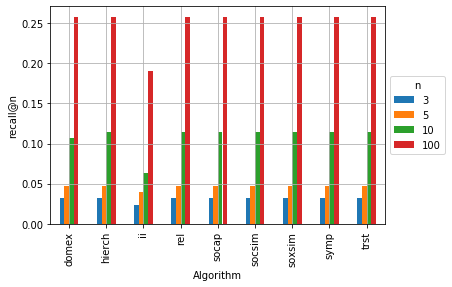

In [26]:
recall_df.pivot("Algorithm", "n", "recall").plot(kind='bar')

ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='n')
ax.grid(zorder=0)
plt.ylabel('recall@n')
plt.show()

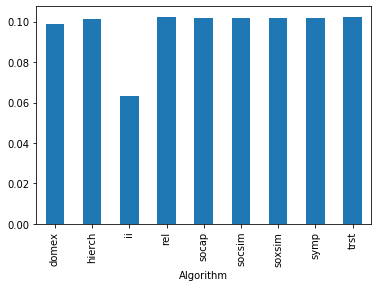

In [27]:
#set_matplotlib_formats('svg')
results100.groupby('Algorithm').ndcg.mean().plot.bar()

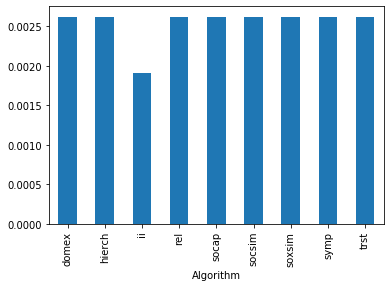

In [28]:
results100.groupby('Algorithm').precision.mean().plot.bar()

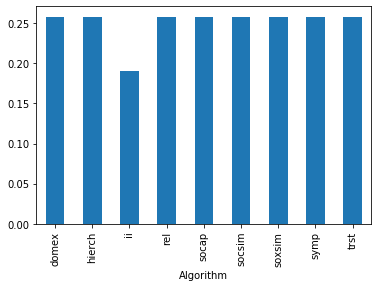

In [29]:
results100.groupby('Algorithm').recall.mean().plot.bar()

### 2. Prediction Metrics: RMSE

Algorithm
domex     0.390730
hierch    0.391371
ii        0.363423
rel       0.391392
socap     0.391495
socsim    0.392392
soxsim    0.391938
symp      0.391092
trst      0.392129
dtype: float64
user
1      0.254842
2      0.351313
3      0.687194
4      0.460852
5      0.693810
         ...   
134    0.358548
135    0.518264
136    0.219335
137    0.258613
138    0.213290
Length: 127, dtype: float64


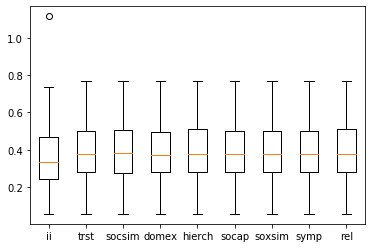

"\nprint('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))\nprint('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))\nprint('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))\nprint('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))\nprint('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))\nprint('Social Capital: max rmse per user 

In [30]:
user_rmse = (preds100.groupby(['Algorithm', 'user']).apply(lambda df: rmse(df.prediction, df.rating))).dropna()
print(user_rmse.groupby('Algorithm').mean())

print(user_rmse['domex'])

plt.boxplot((user_rmse['ii'], user_rmse['trst'], user_rmse['socsim'], user_rmse['domex'], user_rmse['hierch'], user_rmse['socap'], user_rmse['soxsim'], user_rmse['symp'], user_rmse['rel']), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])
plt.show()


"""
print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))
print('Relationship: max rmse per user = ' + str(user_rmse_rel.max()) + ', min rmse per user = ' + str(user_rmse_rel.min()) + ', average rmse per user = ' + str(user_rmse_rel.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])

"""